### Time series analysis

Анализ временных рядов

Загрузка модулей и исходных данных

In [1]:
import numpy as np
import pandas as pd
import itertools
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# Загрузка данных (временного ряда)
timeseries = pd.read_csv('practical_task.csv',';', index_col=['Date'], parse_dates=['Date'], dayfirst=True)

### Анализ временного ряда

In [2]:
timeseries.head()

,Values
Date,
2014-05-01,0
2014-05-02,10
2014-05-03,0
2014-05-04,0
2014-05-05,0


In [3]:
timeseries.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2014-05-01 to 2018-04-30
Data columns (total 1 columns):
Values    1461 non-null int64
dtypes: int64(1)
memory usage: 22.8 KB


In [4]:
timeseries.describe()

,Values
count,1461.000000
mean,2.619439
std,2.624230
min,0.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,10.000000


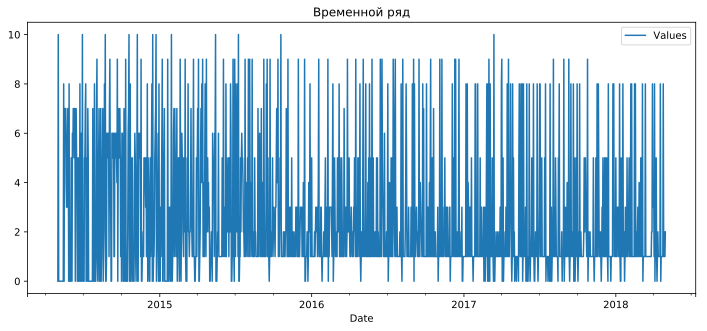

In [5]:
timeseries.plot(figsize=(12, 5), title="Временной ряд")

Как видно из полученного графика, анализировать данные за каждый день не совсем верно и наглядно. Лучше изменить интервал анализа до месяца.

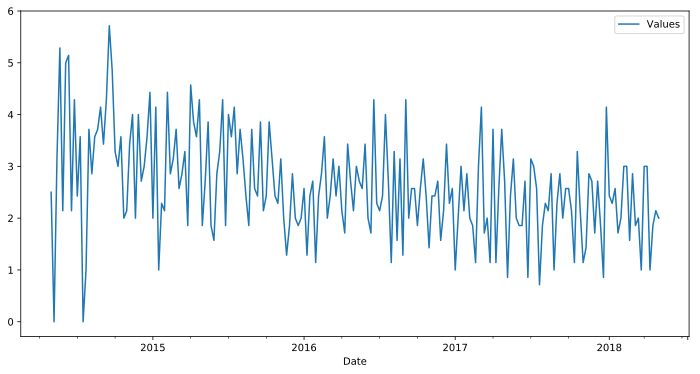

In [6]:
timeseries = timeseries.resample('W').mean()
timeseries.plot(figsize=(12, 6))

Как можно заметить, новый график не имеет ярких выбросов и имеет небольшой тренд на понижение. Из это можно сделать вывод о том, что ряд не является стационарным.

### Модель ARIMA

Модель ARIMA (AutoregRessive Integrated Moving Average) – один из наиболее распространённых методов анализа и прогнозирования временных рядов. Эта модель позволяет обработать данные временного ряда, чтобы лучше понять этот ряд или предсказать его развитие.

ARIMA использует три основных параметра (p, d, q), которые выражаются целыми числами. Потому модель также записывается как ARIMA(p, d, q). Вместе эти три параметра учитывают сезонность, тенденцию и шум в наборах данных:

    p – порядок авторегрессии (AR), который позволяет добавить предыдущие значения временного ряда. Этот параметр можно проиллюстрировать утверждением «завтра, вероятно, будет тепло, если в последние три дня было тепло».

    d – порядок интегрирования (I; т. е. порядок разностей исходного временного ряда). Он добавляет в модель понятия разности временных рядов (определяет количество прошлых временных точек, которые нужно вычесть из текущего значения). Этот параметр иллюстрирует такое утверждение: «завтра, вероятно, будет такая же температура, если разница в температуре за последние три дня была очень мала».

    q – порядок скользящего среднего (MA), который позволяет установить погрешность модели как линейную комбинацию наблюдавшихся ранее значений ошибок.

Подбор параметров для модели ARIMA

In [7]:
# Определяем p, d и q в диапазоне 0-2
p = d = q = range(0, 2)
# Сгенерируем различные комбинации p, q и q
pdq = list(itertools.product(p, d, q))
# Сгенерируем комбинации сезонных параметров p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
# Подбираем оптимальные параметры
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(timeseries, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1025.3189923528043
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:821.6615077417957
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:646.8158406518253
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:519.4475999786686
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:636.47029230658
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:558.436613054056
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:557.6466904686945
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:519.7352475827461
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:885.476809494221
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:757.3340982245398
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:631.0991435476215
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:518.904064958982
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:634.7562470626483
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:546.4321623515235
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:554.2393933245853
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:519.5502620230285
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:711.4126513375792
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:640.2602229545

Согласно полученному выводу, SARIMAX(1, 1, 1)x(1, 1, 1, 12) являются оптимальными параметрами.

Добавим оптимальные параметры в модель.

In [9]:
mod = sm.tsa.statespace.SARIMAX(timeseries, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1122      0.072     -1.564      0.118      -0.253       0.028
ma.L1         -1.0361      0.045    -23.270      0.000      -1.123      -0.949
ar.S.L12       0.0055      0.005      1.025      0.305      -0.005       0.016
ma.S.L12      -1.0000    398.874     -0.003      0.998    -782.779     780.779
sigma2         0.6723    268.162      0.003      0.998    -524.915     526.259


Атрибут summary возвращает много информации, но мы сосредоточим наше внимание на таблице коэффициентов. Столбец coef определяет важность каждого параметра и его влияние на временной ряд. Столбец P>|z| сообщает значимость каждого параметра. Здесь вес (важность) каждого параметра p имеет близкое к 0,05 значение, поэтому разумно сохранить в модели все параметры.

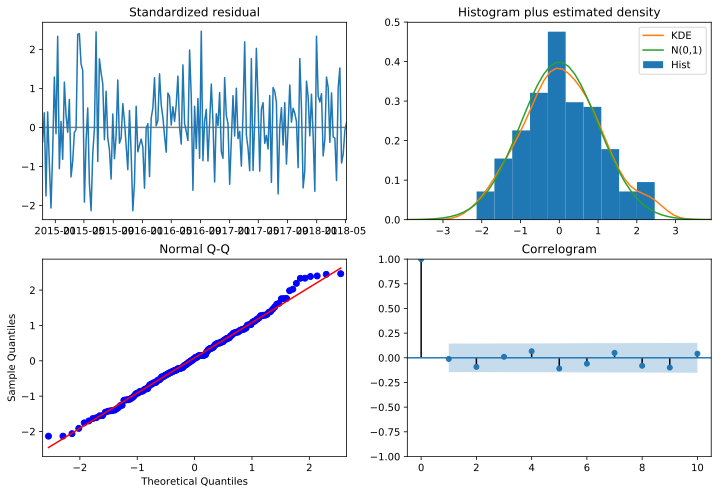

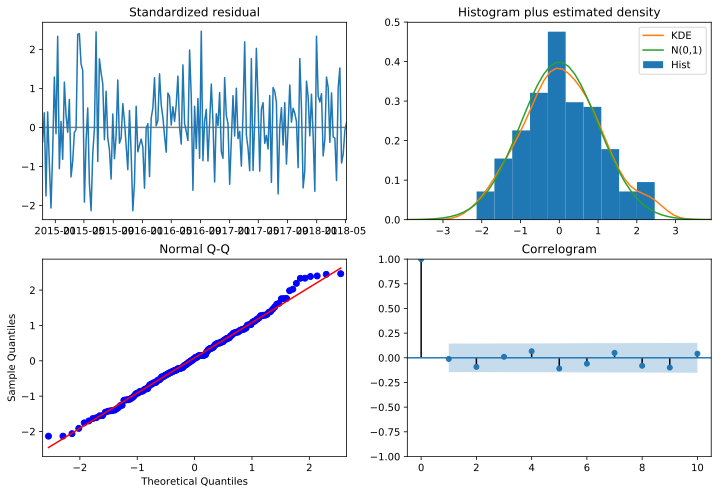

In [10]:
results.plot_diagnostics(figsize=(12, 8))

Эти графики позволяют сделать вывод о том, что выбранная модель (удовлетворительно) подходит для анализа и прогнозирования данных временных рядов.

### Прогнозирование временных рядов

Для начала нужно сравнить прогнозируемые значения с реальными значениями временного ряда, что поможет нам понять точность прогнозов. Атрибуты get_prediction () и conf_int () позволяют получать значения и интервалы для прогнозов временных рядов.

In [11]:
pred = results.get_prediction(dynamic=False)
pred_ci = pred.conf_int()

Text(0, 0.5, 'CO2 Levels')

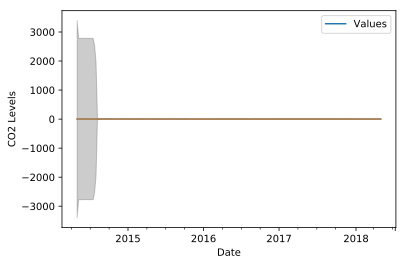

In [12]:
ax = timeseries.plot()
pred.predicted_mean.plot(ax=ax, alpha=.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

In [13]:
y_forecasted = pred.predicted_mean
y_truth = timeseries
mse = ((y_forecasted - y_truth) ** 2).mean()
#print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [14]:
pred_dynamic = results.get_prediction(dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [15]:
# Получить прогноз на 500 шагов вперёд
pred_uc = results.get_forecast(steps=200)
# Получить интервал прогноза
pred_ci = pred_uc.conf_int()

Text(0, 0.5, 'CO2 Levels')

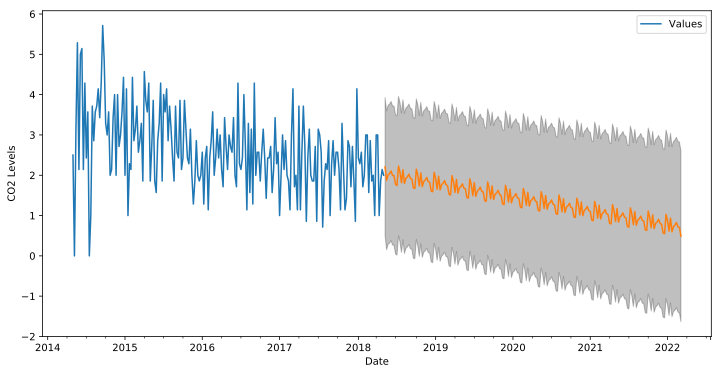

In [16]:
ax = timeseries.plot(figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax)
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

И сгенерированные прогнозы, и связанный с ними интервал теперь можно использовать для дальнейшего анализа и прогнозирования временных рядов. Полученные данные показывают, что временные ряды будут продолжать стабильный спад.

Конечно, чем дальше строится прогноз, тем менее точны его значения. Это отражается на интервалах, генерируемых моделью (чем дальше прогноз, тем больше интервал).